In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

Latest_Date=session.query(measurement.date).order_by(measurement.date.desc()).first()
Latest_Date

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
year_ago_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(year_ago_date)

2016-08-23


In [20]:

# Perform a query to retrieve the data and precipitation scores 
prcp_data = session.query(measurement.prcp, measurement.date).\
            filter(measurement.date >= '2016-08-23'). group_by(measurement.date).all()
print(prcp_data)


[(0.0, '2016-08-23'), (0.08, '2016-08-24'), (0.08, '2016-08-25'), (0.0, '2016-08-26'), (0.0, '2016-08-27'), (0.01, '2016-08-28'), (0.0, '2016-08-29'), (0.0, '2016-08-30'), (0.13, '2016-08-31'), (0.0, '2016-09-01'), (0.0, '2016-09-02'), (0.0, '2016-09-03'), (0.03, '2016-09-04'), (None, '2016-09-05'), (None, '2016-09-06'), (0.05, '2016-09-07'), (0.0, '2016-09-08'), (0.03, '2016-09-09'), (0.0, '2016-09-10'), (0.05, '2016-09-11'), (0.0, '2016-09-12'), (0.02, '2016-09-13'), (1.32, '2016-09-14'), (0.42, '2016-09-15'), (0.06, '2016-09-16'), (0.05, '2016-09-17'), (0.0, '2016-09-18'), (0.0, '2016-09-19'), (0.0, '2016-09-20'), (0.0, '2016-09-21'), (0.02, '2016-09-22'), (0.0, '2016-09-23'), (0.0, '2016-09-24'), (0.0, '2016-09-25'), (0.06, '2016-09-26'), (0.02, '2016-09-27'), (0.0, '2016-09-28'), (0.0, '2016-09-29'), (0.0, '2016-09-30'), (0.0, '2016-10-01'), (0.0, '2016-10-02'), (0.0, '2016-10-03'), (0.0, '2016-10-04'), (0.0, '2016-10-05'), (0.0, '2016-10-06'), (0.0, '2016-10-07'), (0.0, '2016-10-

In [23]:

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns=['precipitation scores ','date'])
prcp_df.set_index('date', inplace=True)


prcp_df
# Sort the dataframe by date


,precipitation scores
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.00
2017-08-20,0.00
2017-08-21,0.00


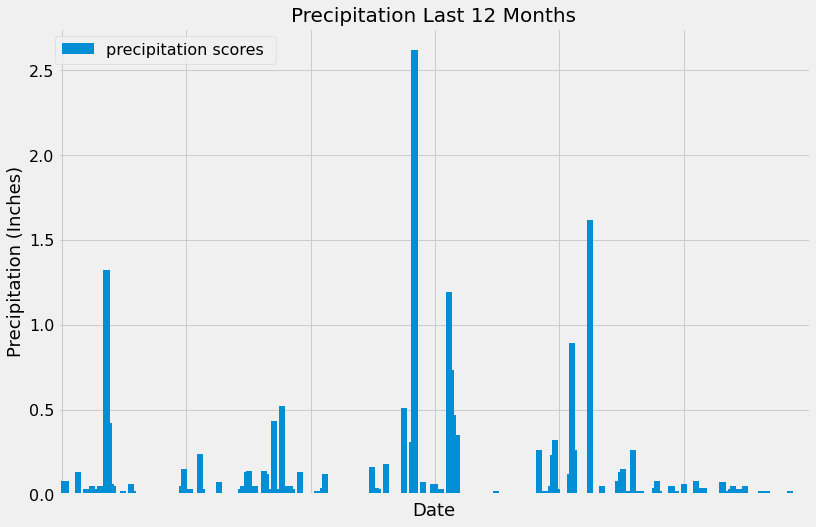

In [30]:
ax = prcp_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.show()

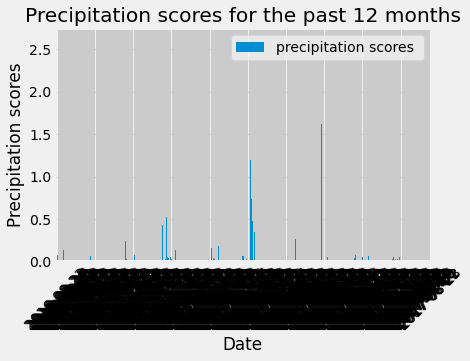

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot.bar()
plt.yticks(size=14)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Precipitation scores")
plt.title("Precipitation scores for the past 12 months")
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
plt.show()


In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation scores
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [33]:
# Design a query to show how many stations are available in this dataset?
stations= session.query(measurement.station).group_by(measurement.station).count()
stations

9

In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity=session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_data= session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

temp_data

[(54.0, 85.0, 71.66378066378067)]

In [43]:
# Choose the station with the highest number of temperature observations. 
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram   group_by(measurement.date)
temp_station = session.query(measurement.date,measurement.tobs).\
            filter(measurement.date >= '2016-08-23').filter(measurement.station == 'USC00519281').all()
print(temp_station)




[('2016-08-23', 77.0), ('2016-08-24', 77.0), ('2016-08-25', 80.0), ('2016-08-26', 80.0), ('2016-08-27', 75.0), ('2016-08-28', 73.0), ('2016-08-29', 78.0), ('2016-08-30', 77.0), ('2016-08-31', 78.0), ('2016-09-01', 80.0), ('2016-09-02', 80.0), ('2016-09-03', 78.0), ('2016-09-04', 78.0), ('2016-09-05', 78.0), ('2016-09-06', 73.0), ('2016-09-07', 74.0), ('2016-09-08', 80.0), ('2016-09-09', 79.0), ('2016-09-10', 77.0), ('2016-09-11', 80.0), ('2016-09-12', 76.0), ('2016-09-13', 79.0), ('2016-09-14', 75.0), ('2016-09-15', 79.0), ('2016-09-16', 78.0), ('2016-09-17', 79.0), ('2016-09-18', 78.0), ('2016-09-19', 78.0), ('2016-09-20', 76.0), ('2016-09-21', 74.0), ('2016-09-22', 77.0), ('2016-09-23', 78.0), ('2016-09-24', 79.0), ('2016-09-25', 79.0), ('2016-09-26', 77.0), ('2016-09-27', 80.0), ('2016-09-28', 78.0), ('2016-09-29', 78.0), ('2016-09-30', 78.0), ('2016-10-01', 77.0), ('2016-10-02', 79.0), ('2016-10-03', 79.0), ('2016-10-04', 79.0), ('2016-10-05', 79.0), ('2016-10-06', 75.0), ('2016-10

In [44]:
temp_station_df = pd.DataFrame(temp_station, columns=['date', 'temperatures'])
temp_station_df.set_index('date', inplace=True)


temp_station_df

,temperatures
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


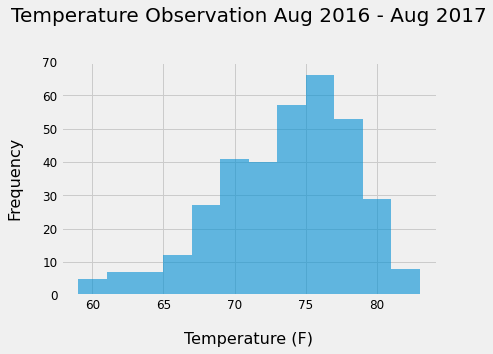

In [46]:
plt.hist(temp_station_df['temperatures'],bins=12,alpha=0.6)

plt.title('Temperature Observation Aug 2016 - Aug 2017',fontsize=20,pad=40)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

plt.show()

## Bonus Challenge Assignment

In [47]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [49]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2017-02-28', '2017-03-05')
print(trip)


[(64.0, 72.02777777777777, 78.0)]


In [50]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip, columns=['Minimum temp', 'Average temp', 'Maximum temp'])
trip_df


,Minimum temp,Average temp,Maximum temp
0,64.0,72.027778,78.0


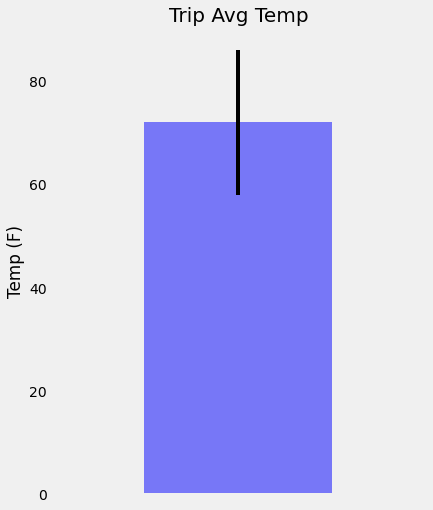

In [51]:
avg_temp = trip_df['Average temp']
min_max_temp = trip_df.iloc[0]['Maximum temp'] - trip_df.iloc[0]['Minimum temp']

avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='blue')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show()


In [53]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(func.sum(measurement.prcp),measurement.date,station.name, station.latitude, station.longitude, station.elevation).\
            filter(measurement.date >= '2017-02-28').filter(measurement.date <= '2017-03-05').filter(measurement.station==station.station).group_by(measurement.station).order_by(func.sum(measurement.prcp).desc()).all()
print(rainfall)




[(4.720000000000001, '2017-02-28', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (4.45, '2017-02-28', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (4.07, '2017-02-28', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), (2.98, '2017-02-28', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (2.7399999999999998, '2017-02-28', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2.32, '2017-02-28', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (1.1600000000000001, '2017-02-28', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]


In [55]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [56]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

trip_dates=['02-28','03-01','03-02','03-03','03-04',
            '03-05']

normals=[]
    
def daily_normals(date):
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

for i in trip_dates:
    normals.append(daily_normals(i)[0])

normals

[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [57]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dates_df = pd.DataFrame(normals, columns=['Minimum tobs', 'Average tobs', 'Maximum tobs'],index=trip_dates)
trip_dates_df.index.name='date'
trip_dates_df

,Minimum tobs,Average tobs,Maximum tobs
date,,,
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


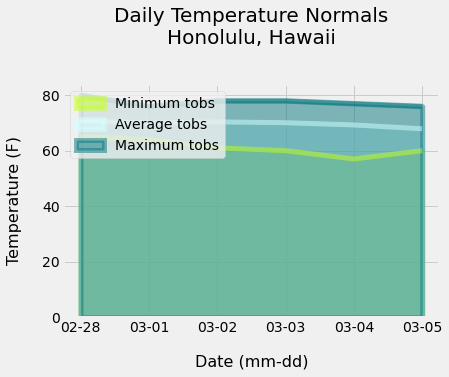

In [63]:
# Plot the daily normals as an area plot with `stacked=False`
#plt.stackplot(trip_dates_df['date'], trip_dates_df['Minimum tobs'], trip_dates_df['Average tobs'],trip_dates_df['Maximum tobs'],labels=['02-28','03-01','03-02','03-03','03-04','03-05'])

trip_dates_df.plot.area(linewidth=5,stacked=False,rot=0,alpha=0.5,color=['xkcd:green yellow','xkcd:very light blue','xkcd:deep aqua'])

plt.legend(loc='upper left')

plt.xlabel('Date (mm-dd)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.title('Daily Temperature Normals\nHonolulu, Hawaii',fontsize=20,pad=40)
plt.show()